In [29]:
import sys
import csv
import tweepy
import matplotlib.pyplot as plt

from collections import Counter
# Necesario registro en https://developer.aylien.com/signup
#pip install --upgrade aylien-apiclient
from aylienapiclient import textapi

if sys.version_info[0] < 3:
   input = raw_input

## Twitter credentials
access_token = "15002884-QxpvkW1jNTQ3YpO9Vn4yW9Cx8n7UyvwdVzVkrmMbw"
access_token_secret = "eaFWhbH2Mn1trxlYoKlLZsk3nzkk4wsiaFTyIkDbLEYob"
consumer_key = "C1voYrjnzAcwjRU1k8SmL72vK"
consumer_secret = "Uvk3ljIL8duuLM7XxLXrlXBBEkHDl040dxgJox8p9pdJVcxRjh"

## AYLIEN credentials


application_id = "75c8b832"
application_key = "2d22662b83c6e54293b45f39d73651ca"

## set up an instance of Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## set up an instance of the AYLIEN Text API
client = textapi.Client(application_id, application_key)

## search Twitter for something that interests you
query = input("What subject do you want to analyze for this example? \n")
number = input("How many Tweets do you want to analyze? \n")

results = api.search(
   lang="es", # Idioma español
   q=query + " -rt",
   count=number,
   result_type="recent"
)

print("--- Gathered Tweets \n")

## open a csv file to store the Tweets and their sentiment 
file_name = 'Sentiment_Analysis_of_{}_Tweets_About_{}.csv'.format(number, query)

with open(file_name, 'ab') as csvfile:
   csv_writer = csv.DictWriter(
       f=csvfile,
       fieldnames=["Tweet", "Sentiment"]
   )
   csv_writer.writeheader()

   print("--- Opened a CSV file to store the results of your sentiment analysis... \n")

## tidy up the Tweets and send each to the AYLIEN Text API
   for c, result in enumerate(results, start=1):
       tweet = result.text
       tidy_tweet = tweet.strip().encode('ascii', 'ignore')

       if len(tweet) == 0:
           print('Empty Tweet')
           continue

       response = client.Sentiment({'text': tidy_tweet})
       csv_writer.writerow({
           'Tweet': response['text'],
           'Sentiment': response['polarity']
       })

       print("Analyzed Tweet {}".format(c))



What subject do you want to analyze for this example? 
realmadrid
How many Tweets do you want to analyze? 
20
--- Gathered Tweets 

--- Opened a CSV file to store the results of your sentiment analysis... 

Analyzed Tweet 1
Analyzed Tweet 2
Analyzed Tweet 3
Analyzed Tweet 4
Analyzed Tweet 5
Analyzed Tweet 6
Analyzed Tweet 7
Analyzed Tweet 8
Analyzed Tweet 9
Analyzed Tweet 10
Analyzed Tweet 11
Analyzed Tweet 12
Analyzed Tweet 13
Analyzed Tweet 14
Analyzed Tweet 15
Analyzed Tweet 16
Analyzed Tweet 17
Analyzed Tweet 18
Analyzed Tweet 19
Analyzed Tweet 20


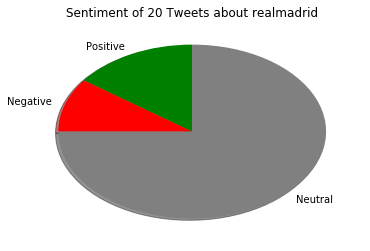

In [30]:
## count the data in the Sentiment column of the CSV file 
with open(file_name, 'r') as data:
   counter = Counter()
   for row in csv.DictReader(data):
       counter[row['Sentiment']] += 1

   positive = counter['positive']
   negative = counter['negative']
   neutral = counter['neutral']

## declare the variables for the pie chart, using the Counter variables for "sizes"
colors = ['green', 'red', 'grey']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()